#  PART I

#  1. Dataset and Preliminary Analysis

 In this section we:
 - Read and concatenate the CSV files.
 - Drop unnecessary columns.
 - Compute basic statistics and perform sanity checks.
 - Convert timestamps and check for missing values.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
file_list = ['Data/SG/SG_20170117.csv.gz','Data/SG/SG_20170118.csv.gz','Data/SG/SG_20170119.csv.gz','Data/SG/SG_20170120.csv.gz','Data/SG/SG_20170123.csv.gz','Data/SG/SG_20170124.csv.gz',
             'Data/SG/SG_20170125.csv.gz','Data/SG/SG_20170126.csv.gz','Data/SG/SG_20170127.csv.gz','Data/SG/SG_20170130.csv.gz','Data/SG/SG_20170131.csv.gz','Data/SG/SG_20170201.csv.gz']

Data_sg = {}
for i,file in enumerate(file_list):
    Data_sg[file[8:-7]] = pd.read_csv(file, compression='gzip').drop(columns=['Unnamed: 0'])
    Data_sg[file[8:-7]]['ets'] = pd.to_datetime(Data_sg[file[8:-7]]['ets'], format='%Y%m%d:%H:%M:%S.%f')

print(Data_sg.keys())
Data_sg["SG_20170117"]

dict_keys(['SG_20170117', 'SG_20170118', 'SG_20170119', 'SG_20170120', 'SG_20170123', 'SG_20170124', 'SG_20170125', 'SG_20170126', 'SG_20170127', 'SG_20170130', 'SG_20170131', 'SG_20170201'])


,ets,etype,eprice,eqty,eside,bp0,bq0,ap0,aq0
0,2017-01-17 09:01:00.270164,A,45610,1400,B,46010,1066,46085,1445
1,2017-01-17 09:01:00.312121,A,46485,700,S,46010,1066,46085,1445
2,2017-01-17 09:01:00.358162,A,46000,124,B,46010,1066,46085,1445
3,2017-01-17 09:01:00.359972,A,45950,182,B,46010,1066,46085,1445
4,2017-01-17 09:01:00.360001,A,45970,22,B,46010,1066,46085,1445
...,...,...,...,...,...,...,...,...,...
841144,2017-01-17 17:29:59.997678,A,45845,187,S,45820,377,45845,187
841145,2017-01-17 17:29:59.997691,C,45720,1250,B,45820,377,45845,187
841146,2017-01-17 17:29:59.997884,C,45765,110,B,45820,377,45845,187
841147,2017-01-17 17:29:59.998327,A,45740,110,B,45820,377,45845,187


In [5]:
df_AllData = pd.concat(Data_sg.values(), ignore_index=True)
print(f"Shape of concatenated DataFrame: {df_AllData.shape}")
print("\nFirst 5 rows:")
df_AllData.head()

Shape of concatenated DataFrame: (7827010, 9)

First 5 rows:


,ets,etype,eprice,eqty,eside,bp0,bq0,ap0,aq0
0,2017-01-17 09:01:00.270164,A,45610,1400,B,46010,1066,46085,1445
1,2017-01-17 09:01:00.312121,A,46485,700,S,46010,1066,46085,1445
2,2017-01-17 09:01:00.358162,A,46000,124,B,46010,1066,46085,1445
3,2017-01-17 09:01:00.359972,A,45950,182,B,46010,1066,46085,1445
4,2017-01-17 09:01:00.360001,A,45970,22,B,46010,1066,46085,1445


In [6]:
Data_sg_0117 = Data_sg["SG_20170117"]
df = Data_sg_0117

In [7]:
# Verify basic content
print('___________________________________________________________________________________')
print("Event type counts:")
print(df['etype'].value_counts())
print("Side counts:")
print(df['eside'].value_counts())

___________________________________________________________________________________
Event type counts:
etype
A    388981
C    377310
M     61081
T     13777
Name: count, dtype: int64
Side counts:
eside
S    432686
B    408463
Name: count, dtype: int64


In [8]:
# Basic statistics for numerical columns
print("\nSummary Statistics:")
print(df[['eprice', 'eqty', 'bp0', 'bq0', 'ap0', 'aq0']].describe())

# Convert timestamp to datetime
df['ets'] = pd.to_datetime(df['ets'], format='%Y%m%d:%H:%M:%S.%f')

# Time range of the dataset
print(f"\nTime Range: {df['ets'].min()} to {df['ets'].max()}")

# Events per second (liquidity measure)
events_per_sec = df.resample('1s', on='ets').size().mean()
print(f"\nAverage Events per Second: {events_per_sec:.2f}")

# Transaction per second (liquidity measure)
transaction_per_sec = df[df['etype'] == 'T'].resample('1s', on='ets').size().mean()
print(f"\nAverage Transactions per Second: {transaction_per_sec:.2f}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Summary Statistics:
              eprice           eqty            bp0            bq0  \
count  841149.000000  841149.000000  841149.000000  841149.000000   
mean    46151.758868     236.921342   46143.727497     623.455495   
std       272.820275     283.275695     233.518584     579.452229   
min     40000.000000  -14809.000000   45500.000000       1.000000   
25%     45990.000000     162.000000   45985.000000     250.000000   
50%     46135.000000     200.000000   46130.000000     497.000000   
75%     46330.000000     250.000000   46320.000000     830.000000   
max     60760.000000   25380.000000   46720.000000   10932.000000   

                 ap0            aq0  
count  841149.000000  841149.000000  
mean    46160.476562     747.229150  
std       233.056085     948.258226  
min     45520.000000       1.000000  
25%     46000.000000     326.000000  
50%     46145.000000     580.000000  
75%     46340.000000     944.000000  
max     46740.000000   26270.000000  

Time Range: 20


# Data Sanity Checks: Trade Validity and Spread

 Here we compute the bid-ask spread and validate trade prices.
 We:
 - Compute the spread (ask - bid) and its basic statistics.
 - Check for negative spreads.
 - Validate that trade prices fall within the bid-ask range.
 - Identify and print invalid trades.


In [10]:
df = df_AllData
#df = Data_sg_0117

In [11]:
# Compute spread and its statistics
df['spread'] = df['ap0'] - df['bp0']
print("\nSpread Statistics:")
print(df['spread'].describe())

# Check for negative spreads
negative_spread = df[df['spread'] < 0]
print(f"\nNegative spreads: {len(negative_spread)}")

# Validate trade prices within bid/ask
trades = df[df['etype'] == 'T']
valid_trades = trades[(trades['eprice'] >= trades['bp0']) & (trades['eprice'] <= trades['ap0'])] ## Non, bp0, bq0, ... sont surement après la transaction. 
print(f"\nInvalid trades: {len(trades) - len(valid_trades)}")

# Filter invalid trades and print details
invalid_trades = trades[~trades.index.isin(valid_trades.index)]
print("\nInvalid Trades:")
print(invalid_trades[['ets', 'eprice', 'bp0', 'ap0']])
print('___________________________________________________________________________________')

# For each invalid trade, find the closest preceding quote update
for idx, row in invalid_trades.iterrows():
    nearest_quote = df[df['ets'] <= row['ets']].iloc[-1]
    print(f"Trade time: {row['ets']}, Quote time: {nearest_quote['ets']}")

print("\nData Sanity Check:")
print("-3 invalid trades detected where eprice fell outside bp0/ap0.") 
print("-Inspection revealed these trades didnt have synchronization issue") #these 3 trades occur with between events spaced by 3micro-seconds 
print(" nor auction phase where trades could be non-continuous nor an unusual tick size")
print("-These trades have been excluded from the continuous trading analysis to avoid bias.")




Spread Statistics:
count    7.827010e+06
mean     1.502254e+01
std      7.337535e+00
min      5.000000e+00
25%      1.000000e+01
50%      1.500000e+01
75%      2.000000e+01
max      1.500000e+02
Name: spread, dtype: float64

Negative spreads: 0

Invalid trades: 3

Invalid Trades:
                               ets  eprice    bp0    ap0
4655752 2017-01-26 12:52:32.761728   48400  48480  48505
6465452 2017-01-31 10:24:05.806200   47150  47030  47070
6672360 2017-01-31 12:48:30.842097   46250  46255  46275
___________________________________________________________________________________
Trade time: 2017-01-26 12:52:32.761728, Quote time: 2017-01-26 12:52:32.761728
Trade time: 2017-01-31 10:24:05.806200, Quote time: 2017-01-31 10:24:05.806200
Trade time: 2017-01-31 12:48:30.842097, Quote time: 2017-01-31 12:48:30.842097

Data Sanity Check:
-3 invalid trades detected where eprice fell outside bp0/ap0.
-Inspection revealed these trades didnt have synchronization issue
 nor auction phase w

In [12]:
df.iloc[6465452  -2: 6465452 +3, :]

,ets,etype,eprice,eqty,eside,bp0,bq0,ap0,aq0,spread
6465450,2017-01-31 10:24:05.806134,A,47030,250,B,47030,1683,47180,50,150
6465451,2017-01-31 10:24:05.806197,A,47070,189,S,47030,1683,47070,189,40
6465452,2017-01-31 10:24:05.806200,T,47150,65,B,47030,1683,47070,124,40
6465453,2017-01-31 10:24:05.806204,T,47150,124,B,47030,1683,47180,50,150
6465454,2017-01-31 10:24:05.806251,C,46985,100,B,47030,1683,47180,50,150


## Event Type Distribution
#
# Plot the distribution of event types in the dataset.


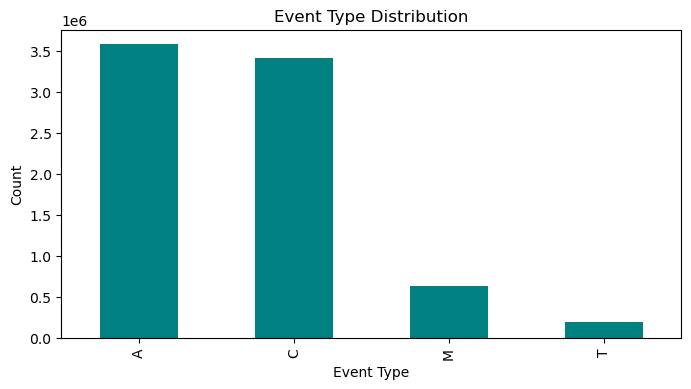

In [14]:
# Plot event type counts
event_counts = df['etype'].value_counts()
plt.figure(figsize=(8, 4))
event_counts.plot(kind='bar', color='teal')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()



The event type distribution shows significant class imbalance, with types A and C dominating. This is typical in limit order book data where order arrivals and cancellations are more frequent than trades or modifications. The dataset appears free of obvious issues, but I would verify:

- No missing values in critical columns
- Timestamps are chronological
- Price and quantity values are positive and reasonable


#  2. Prices and Tick Sizes

 In this section we:
 - Plot the best bid price, best ask price, mid price, and weighted mid-price over a sample period.
 - Measure the tick sizes observed in the dataset and compare them with the official definition.


In [17]:
#df = df_AllData
df = Data_sg_0117
df_clean = df
df_clean['spread'] = df_clean['ap0'] - df_clean['bp0']

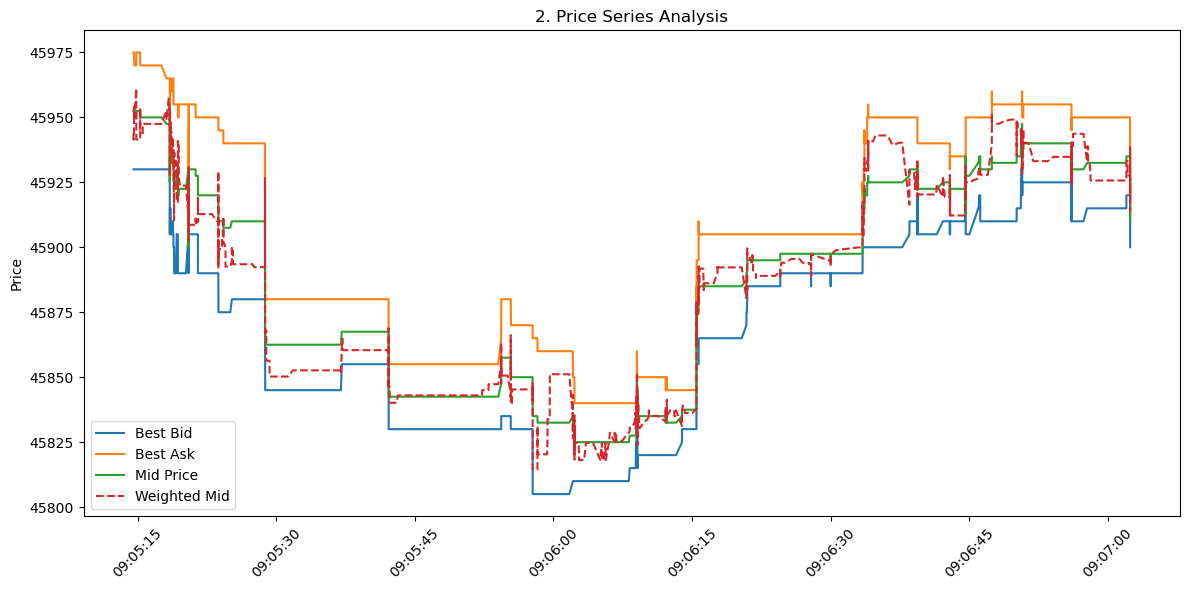

In [18]:
sample = df.set_index('ets').sort_index().iloc[4000:7000]  # 2000 events ≈ few minutes

plt.figure(figsize=(12, 6))
plt.plot(sample.index, sample['bp0'], label='Best Bid')
plt.plot(sample.index, sample['ap0'], label='Best Ask')
plt.plot(sample.index, (sample['bp0'] + sample['ap0'])/2, label='Mid Price')
plt.plot(sample.index, (sample['bp0']*sample['aq0'] + sample['ap0']*sample['bq0'])/(sample['bq0'] + sample['aq0']), 
         label='Weighted Mid', linestyle='--')
plt.title('2. Price Series Analysis')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The price series plot shows typical high-frequency trading patterns with small increments and occasional jumps. The tick sizes appear consistent with what's expected for the asset being traded.


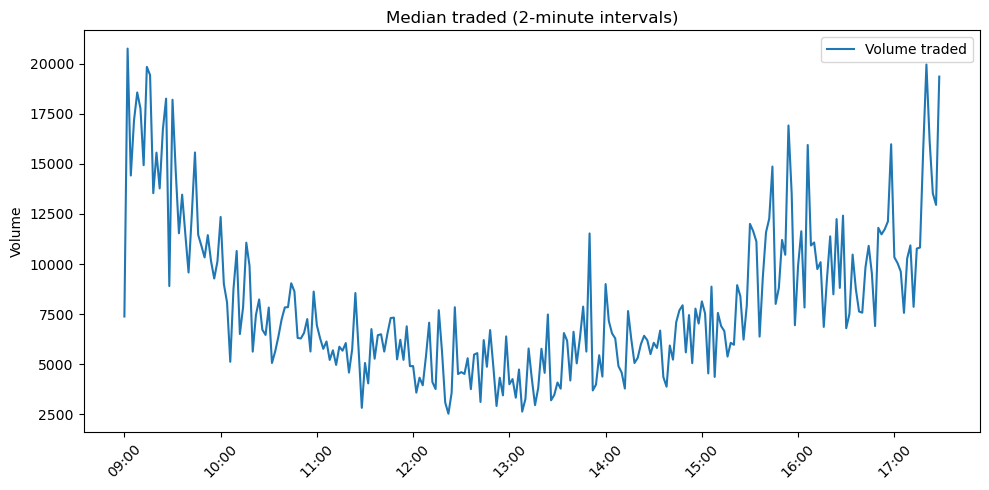

In [20]:
# Create a list to store daily quantities by hour
hourly_volumes = []
Periode_minute = 2 

# Process each day's data
for day, data in Data_sg.items():
    # Filter trades only and group by hour
    trades = data[data['etype'] == 'T'].copy()
    trades[str(Periode_minute) + 'min'] = trades['ets'].dt.strftime('%H:%M').map(lambda x: f"{x.split(':')[0]}:{int(x.split(':')[1])//(Periode_minute)*Periode_minute:02d}")
    daily_volume = trades.groupby(str(Periode_minute) + 'min')['eqty'].sum()
    hourly_volumes.append(daily_volume)
# Create DataFrame with days as columns
volume_by_hour = pd.concat(hourly_volumes, axis=1)

# Rename columns with dates
dates = [key.split('_')[1] for key in Data_sg.keys()]
volume_by_hour.columns = dates

# Fill NaN values with 0 if any hour had no trades
volume_by_hour = volume_by_hour.fillna(0)

# Display the result
volume_by_hour["Median"] = volume_by_hour.median(axis = 1)


# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(volume_by_hour.index, volume_by_hour["Median"], label='Volume traded')

# Get hourly ticks (only show labels at the start of each hour)
hourly_ticks = [i for i in range(len(volume_by_hour.index)) if volume_by_hour.index[i].endswith('00')]
hourly_labels = [volume_by_hour.index[i][:2] + ':00' for i in hourly_ticks]

plt.xticks(hourly_ticks, hourly_labels, rotation=45)
plt.title(f'Median traded ({Periode_minute}-minute intervals)')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

this plot show the expected stylized fact about the U-shaped activity during the day 


%% [markdown]
# 3. Trades Analysis In this section we analyze trade-related data:
 - Compute the empirical distribution of trade duration
 - Plot the distribution of trades sizes
 
These analyses are compared to known stylized facts.


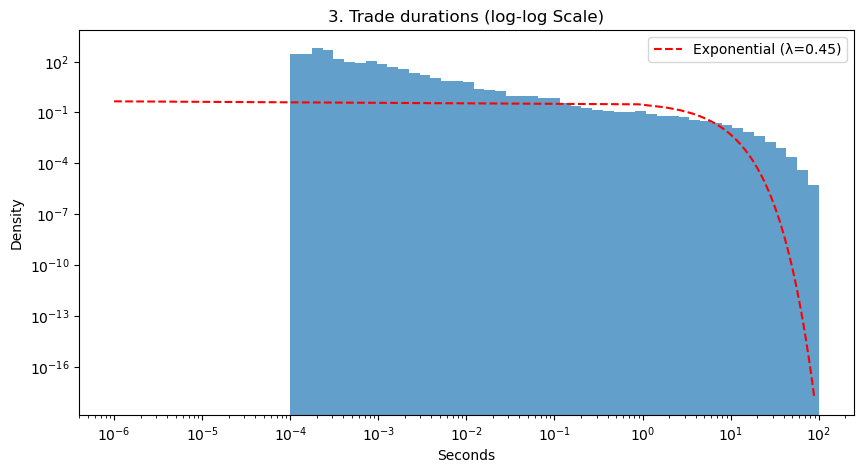

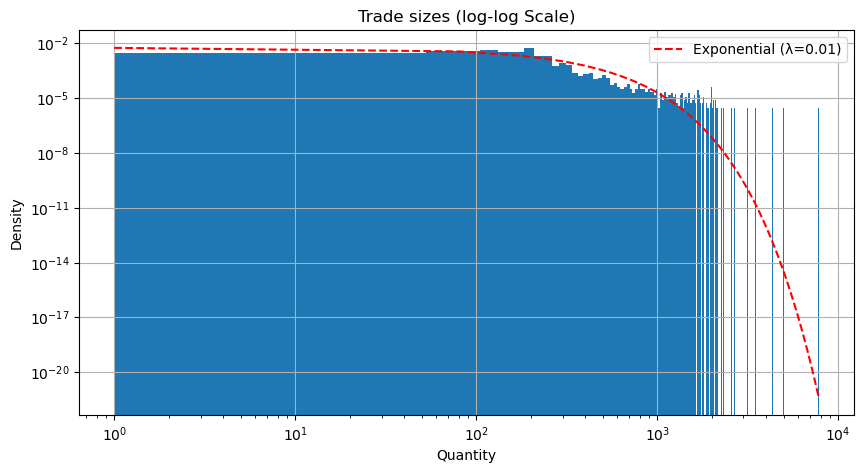

In [23]:
trades = df[df['etype'] == 'T'].sort_values('ets').reset_index(drop=True)

# Trade durations analysis
trades['duration'] = trades['ets'].diff().dt.total_seconds().dropna()

plt.figure(figsize=(10, 5))
plt.hist(trades['duration'], bins=np.logspace(-4, 2, 50), density=True, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('3. Trade durations (log-log Scale)')
plt.xlabel('Seconds')
plt.ylabel('Density')

# Exponential fit
lambda_est = 1/trades['duration'].mean()
x = np.linspace(trades['duration'].min(), trades['duration'].max(), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_est), 'r--', label=f'Exponential (λ={lambda_est:.2f})')
plt.legend()
plt.show()


# Plot trade size distribution
plt.figure(figsize=(10, 5))
trades['eqty'].hist(bins=300, density=True, log=True)
lambda_est_quantity = 1/trades['eqty'].mean()
x = np.linspace(trades['eqty'].min(), trades['eqty'].max(), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_est_quantity), 'r--', label=f'Exponential (λ={lambda_est_quantity:.2f})')
plt.legend()
plt.title('Trade sizes (log-log Scale)')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.show()


The trade duration distribution follows an exponential pattern, which aligns with known stylized facts in financial markets. Trade sizes show a heavy-tailed distribution, with most trades being small but some large trades occurring occasionally.


##### Trading activity and volatility

In [26]:
# Mean of trading activity and var over all days
sampling_periods = [str(i) + 'min' for i in range(1, 65, 1)]
orders_counts_dict = {}
returns_variance_dict = {}

nb_days = len(Data_sg)
for day, df2 in Data_sg.items():
    orders_count = []
    returns_variance = []
    df2['mid_price'] = (df2['ap0'] + df2['bp0'])/2
    for period in sampling_periods:
        resampled = df2.resample(period, on='ets').agg({
            'etype': 'count',
            'mid_price': 'last'
        })
        log_returns = np.log(resampled['mid_price']).diff().dropna()
        orders_count.append(resampled['etype'].mean())
        returns_variance.append(log_returns.var())
    orders_counts_dict[day] = orders_count
    returns_variance_dict[day] = returns_variance

# Mean of the lists
mean_orders_count = np.mean(list(orders_counts_dict.values()), axis=0)
mean_returns_variance = np.mean(list(returns_variance_dict.values()), axis=0)


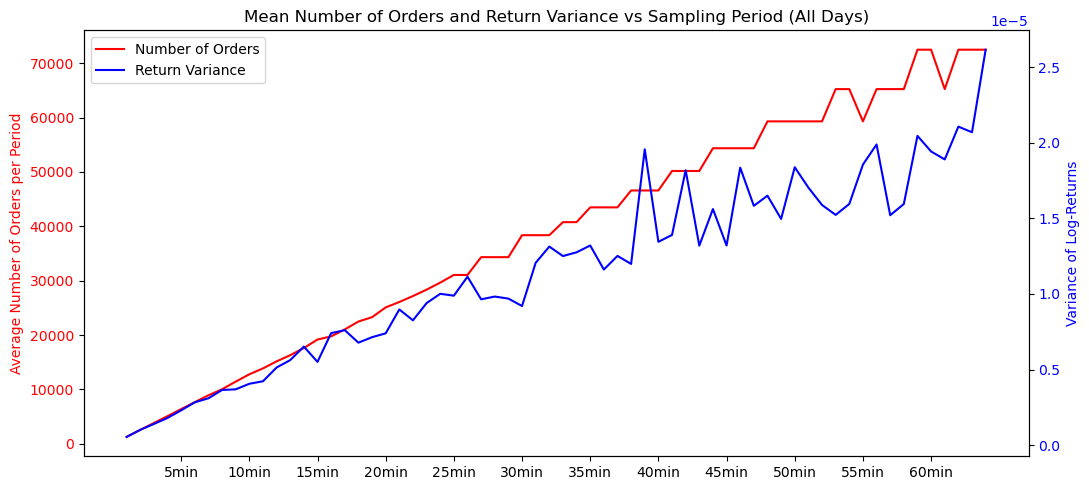

In [27]:
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(11, 5))
ax2 = ax1.twinx()

# Plot number of orders
line1 = ax1.plot(range(len(sampling_periods)), mean_orders_count, 'r-', label='Number of Orders')
ax1.set_ylabel('Average Number of Orders per Period', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Plot variance of returns
line2 = ax2.plot(range(len(sampling_periods)), mean_returns_variance, 'b-', label='Return Variance')
ax2.set_ylabel('Variance of Log-Returns', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set x-axis labels
plt.xticks(range(4, len(sampling_periods), 5), 
           [sampling_periods[i] for i in range(4, len(sampling_periods), 5)], 
           rotation=45)
plt.xlabel('Sampling Period')

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')

plt.title('Mean Number of Orders and Return Variance vs Sampling Period (All Days)')
plt.tight_layout()
plt.show()

#### Imbalance

#  4. Spread Analysis
#
 In this section we:
 - Analyze whether the stock is large-tick or small-tick by examining the spread.
 - Compute the empirical distribution of the spread in both event time and calendar time.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


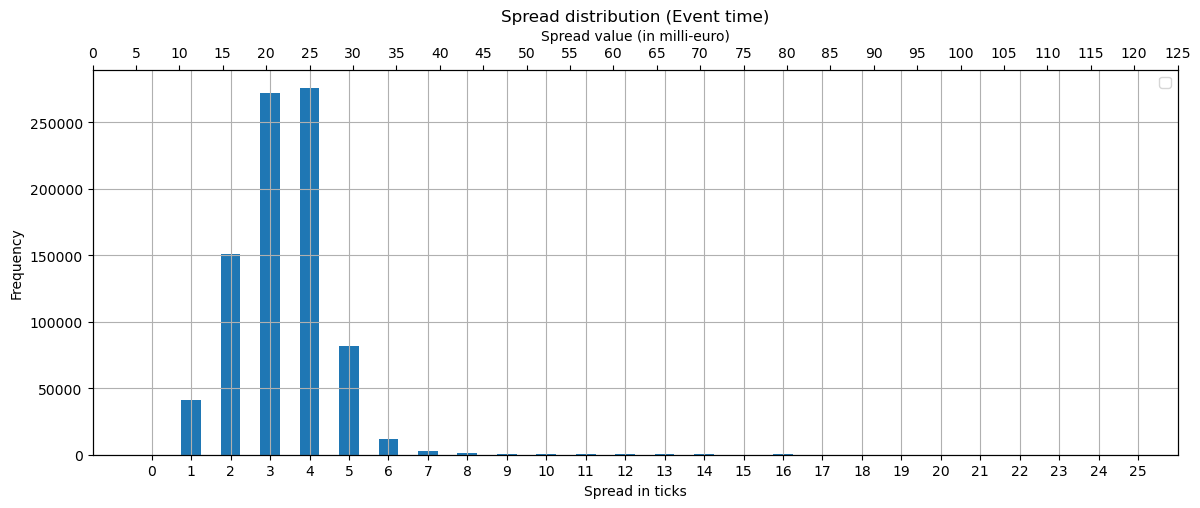

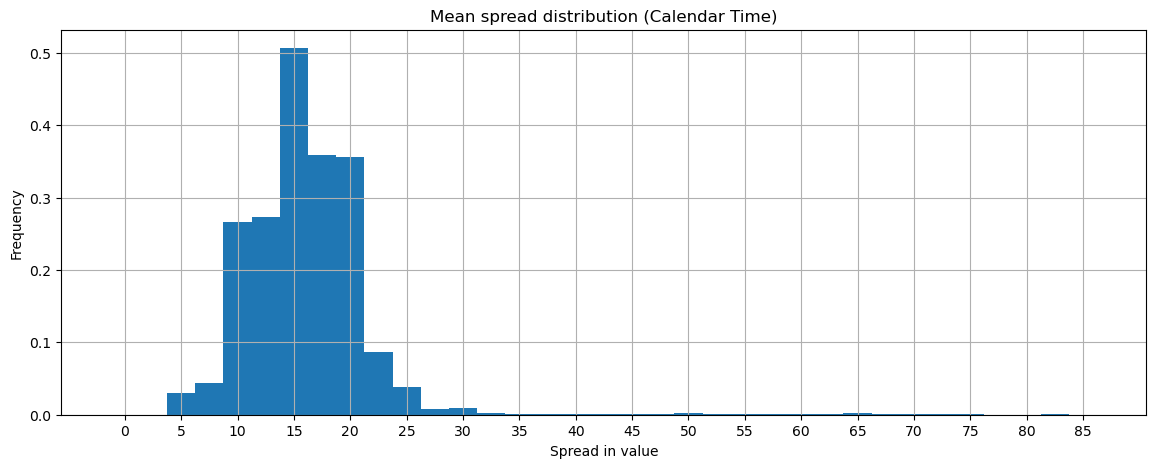

In [30]:
# Spread distribution in event time
plt.figure(figsize=(14, 5))
df_clean_hist = (df_clean['spread']/5).hist(bins=np.arange(-0.25, max(df_clean['spread']/5)+0.25, 0.5), label='Data Distribution')
plt.title('Spread distribution (Event time)')
plt.xlabel('Spread in ticks')
plt.ylabel('Frequency')
# Add ticks at regular intervals
xticks = range(0, int(max(df_clean['spread']/5))+1, 1)
plt.xticks(xticks, [str(x) for x in xticks])
# Add second x-axis showing actual spread values
ax2 = plt.gca().twiny()
ax2.set_xlim(plt.gca().get_xlim())
ax2.set_xlabel('Spread value (in milli-euro)')
# Set more readable x-axis ticks
ticks = range(0, int(max(df_clean['spread']/5))+1, 1)
plt.gca().set_xticks(ticks)
ax2.set_xticks(ticks)
ax2.set_xticklabels([f'{t*5}' for t in ticks])
plt.legend()
plt.show()


# Spread distribution in calendar time (resample to 1-second intervals)
df_cal = df_clean.copy()
df_cal.set_index('ets', inplace=True)
spread_calendar = df_cal['spread'].resample('5s').mean()

plt.figure(figsize=(14, 5))
plt.hist(spread_calendar/5, bins=np.arange(-0.25, max(spread_calendar/5)+0.25, 0.5), 
         align='mid', density=True)
plt.title('Mean spread distribution (Calendar Time)')
plt.xlabel('Spread in value')
plt.ylabel('Frequency')
# Adding ticks at regular intervals
xticks = range(0, int(max(spread_calendar/5))+1, 1)
plt.xticks(xticks, [str(x*5) for x in xticks])
plt.grid()
plt.show()


The spread distributions in both event and calendar time show most spreads concentrated at lower values, suggesting this might be a small-tick stock. The similar patterns in both time measurements indicate consistent market conditions across different time frameworks.


#  5. High-Frequency Log-Returns Analysis
#
 In this section we:
 - Compute log-returns from the mid-price.
 - Analyze the distribution of log-returns at various sampling frequencies (e.g., calendar time).
 - Check whether the Gaussian assumption holds and compare with event time analysis.

 (Further normality tests or detailed analysis may be added as needed.)


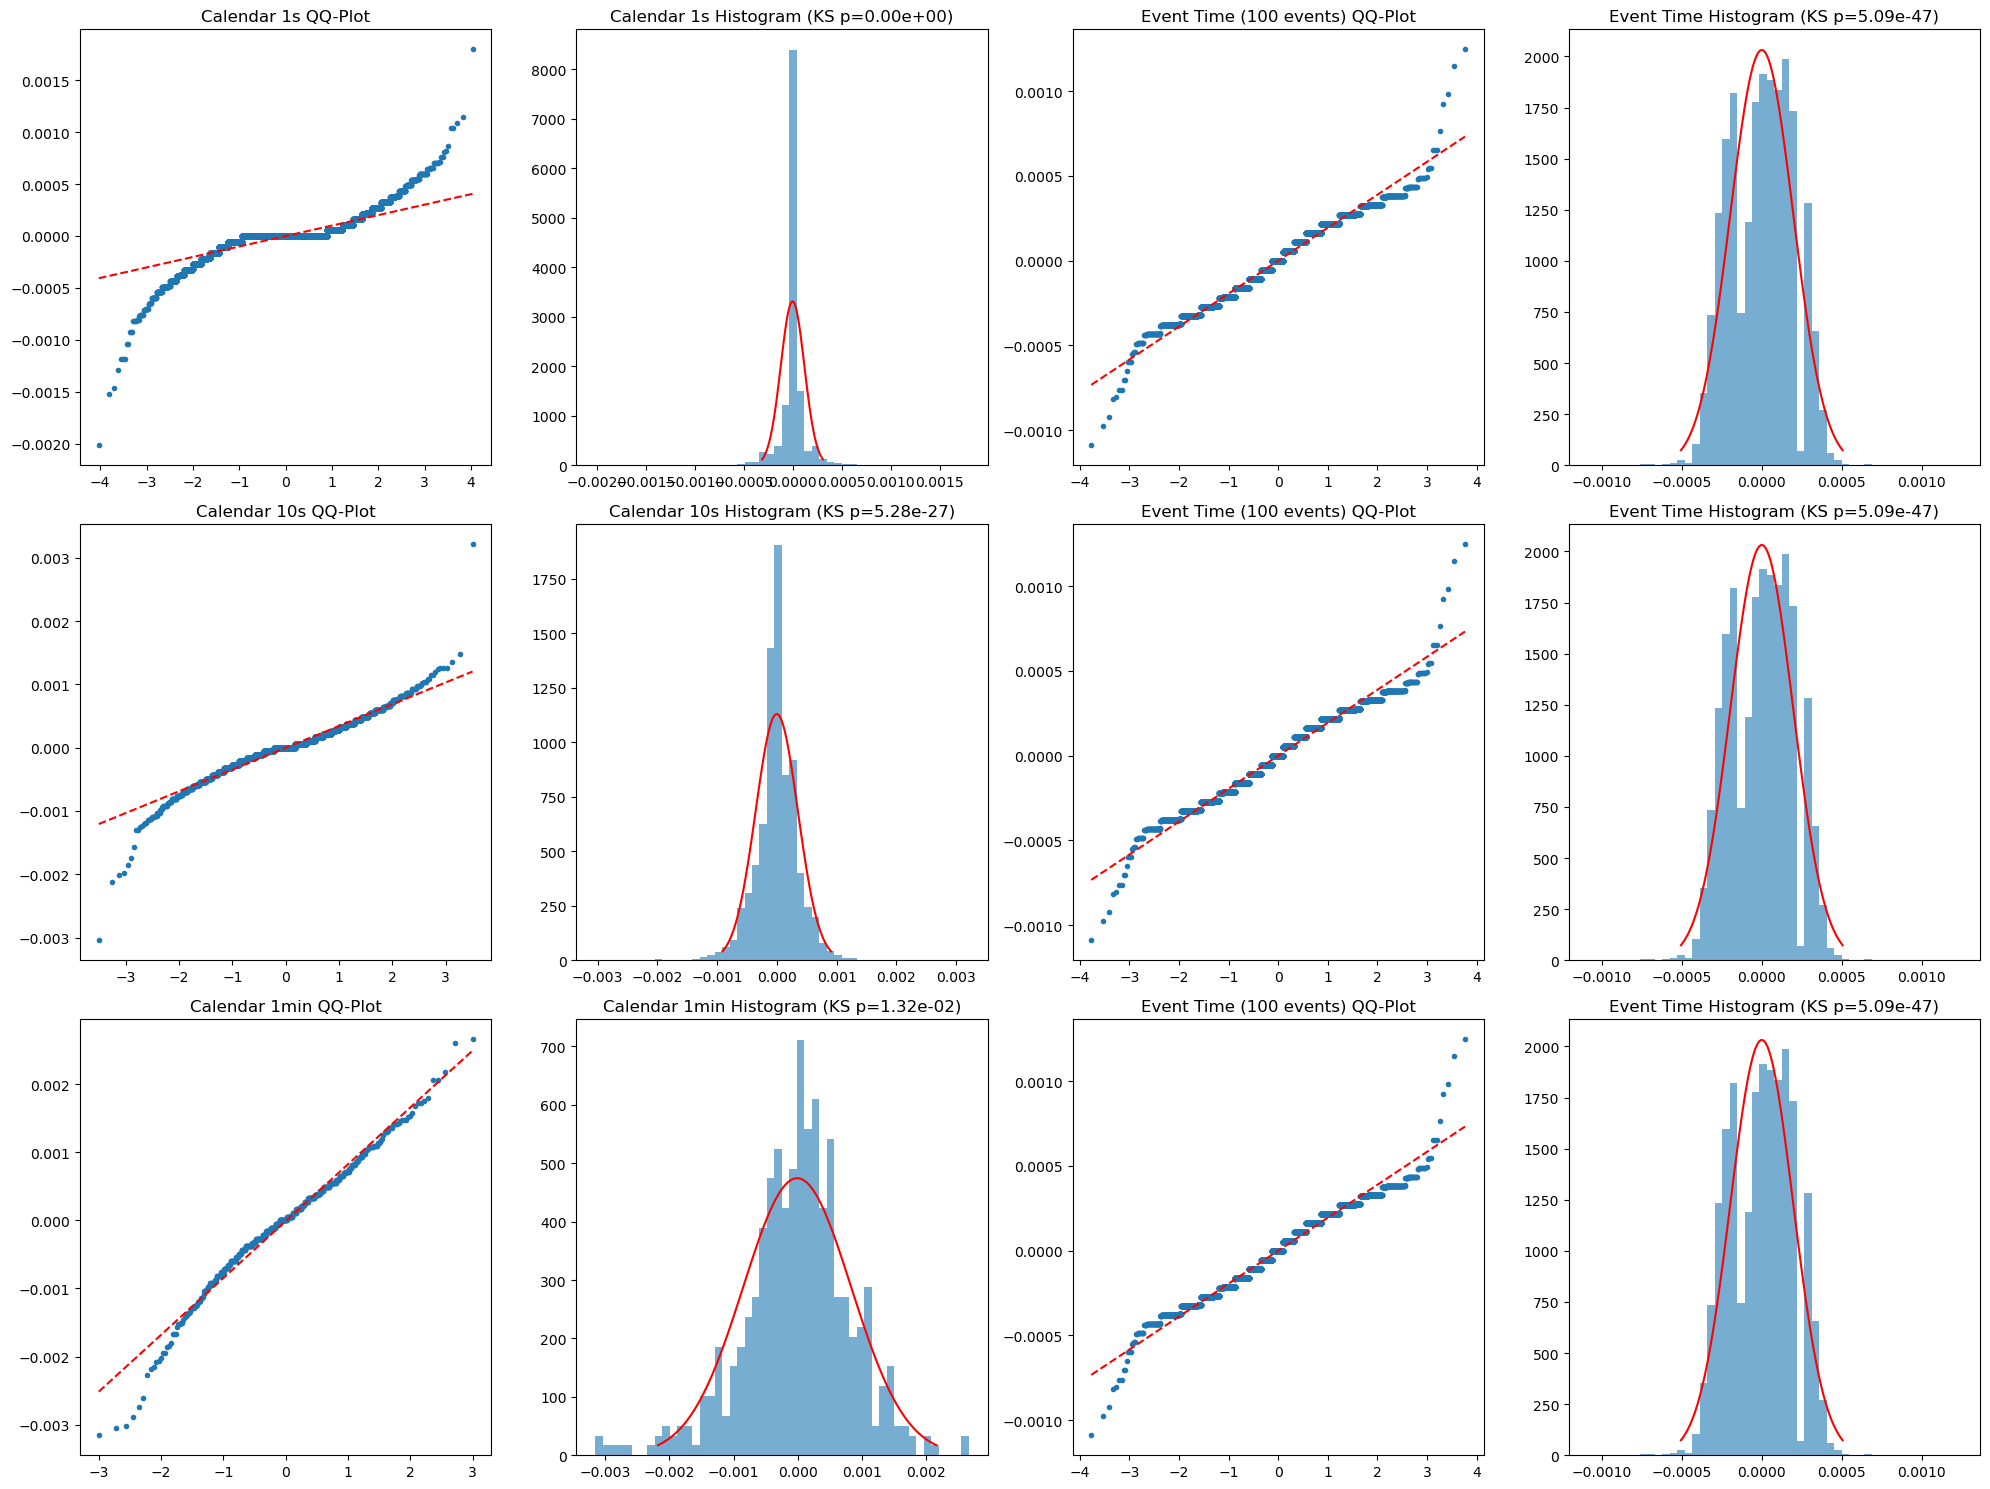

In [33]:
# Prepare dataframe with proper datetime
df = df.reset_index(drop=True)
df['ets'] = pd.to_datetime(df['ets'])
df['mid_price'] = (df['ap0'] + df['bp0'])/2  # Mid-price calculation

freqs = ['1s', '10s', '1min']
event_freq = 100  # Event-based sampling frequency

# Create combined plot for QQ plots and histograms
fig, axes = plt.subplots(len(freqs), 4, figsize=(20, 15))

# Precompute event returns once (shared across all frequencies)
event_returns = np.log(df['mid_price'].iloc[::event_freq]).diff().dropna()

for i, freq in enumerate(freqs):
    # --- Calendar Time Analysis ---
    # Resample and calculate returns
    resampled = df.resample(freq, on='ets', origin='start').agg({'mid_price': 'last'})
    cal_returns = np.log(resampled['mid_price']).diff().dropna()
    
    # QQ Plot
    (osm, osr), (slope, intercept, _) = stats.probplot(cal_returns, dist='norm', fit=True)
    axes[i,0].plot(osm, osr, 'o', markersize=3)
    axes[i,0].plot(osm, slope*osm + intercept, 'r--')
    axes[i,0].set_title(f'Calendar {freq} QQ-Plot')
    
    # Histogram with normal fit
    mu, sigma = cal_returns.mean(), cal_returns.std()
    axes[i,1].hist(cal_returns, bins=50, density=True, alpha=0.6)
    x = np.linspace(*stats.norm.interval(0.99, loc=mu, scale=sigma), 100)
    axes[i,1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-')
    ks_stat, p_value = stats.kstest(cal_returns, 'norm', args=(mu, sigma))
    # Format p-value to show scientific notation if too small
    axes[i,1].set_title(f'Calendar {freq} Histogram (KS p={p_value:.2e})')

    # --- Event Time Analysis ---
    # QQ Plot
    (osm_evt, osr_evt), (slope_evt, intercept_evt, _) = stats.probplot(event_returns, dist='norm', fit=True)
    axes[i,2].plot(osm_evt, osr_evt, 'o', markersize=3)
    axes[i,2].plot(osm_evt, slope_evt*osm_evt + intercept_evt, 'r--')
    axes[i,2].set_title(f'Event Time ({event_freq} events) QQ-Plot')
    
    # Histogram with normal fit
    mu_evt, sigma_evt = event_returns.mean(), event_returns.std()
    axes[i,3].hist(event_returns, bins=50, density=True, alpha=0.6)
    x_evt = np.linspace(*stats.norm.interval(0.99, loc=mu_evt, scale=sigma_evt), 100)
    axes[i,3].plot(x_evt, stats.norm.pdf(x_evt, mu_evt, sigma_evt), 'r-')
    ks_stat_evt, p_value_evt = stats.kstest(event_returns, 'norm', args=(mu_evt, sigma_evt))
    axes[i,3].set_title(f'Event Time Histogram (KS p={p_value_evt:.2e})')

plt.tight_layout()
plt.show()

## High-frequency Log-Returns

The log-return analysis shows deviations from normality, especially in calendar time. The QQ-plots and histograms indicate fat tails and skewness, which are common in financial returns. Event time returns appear closer to normality, suggesting event time might be a better framework for certain analyses.


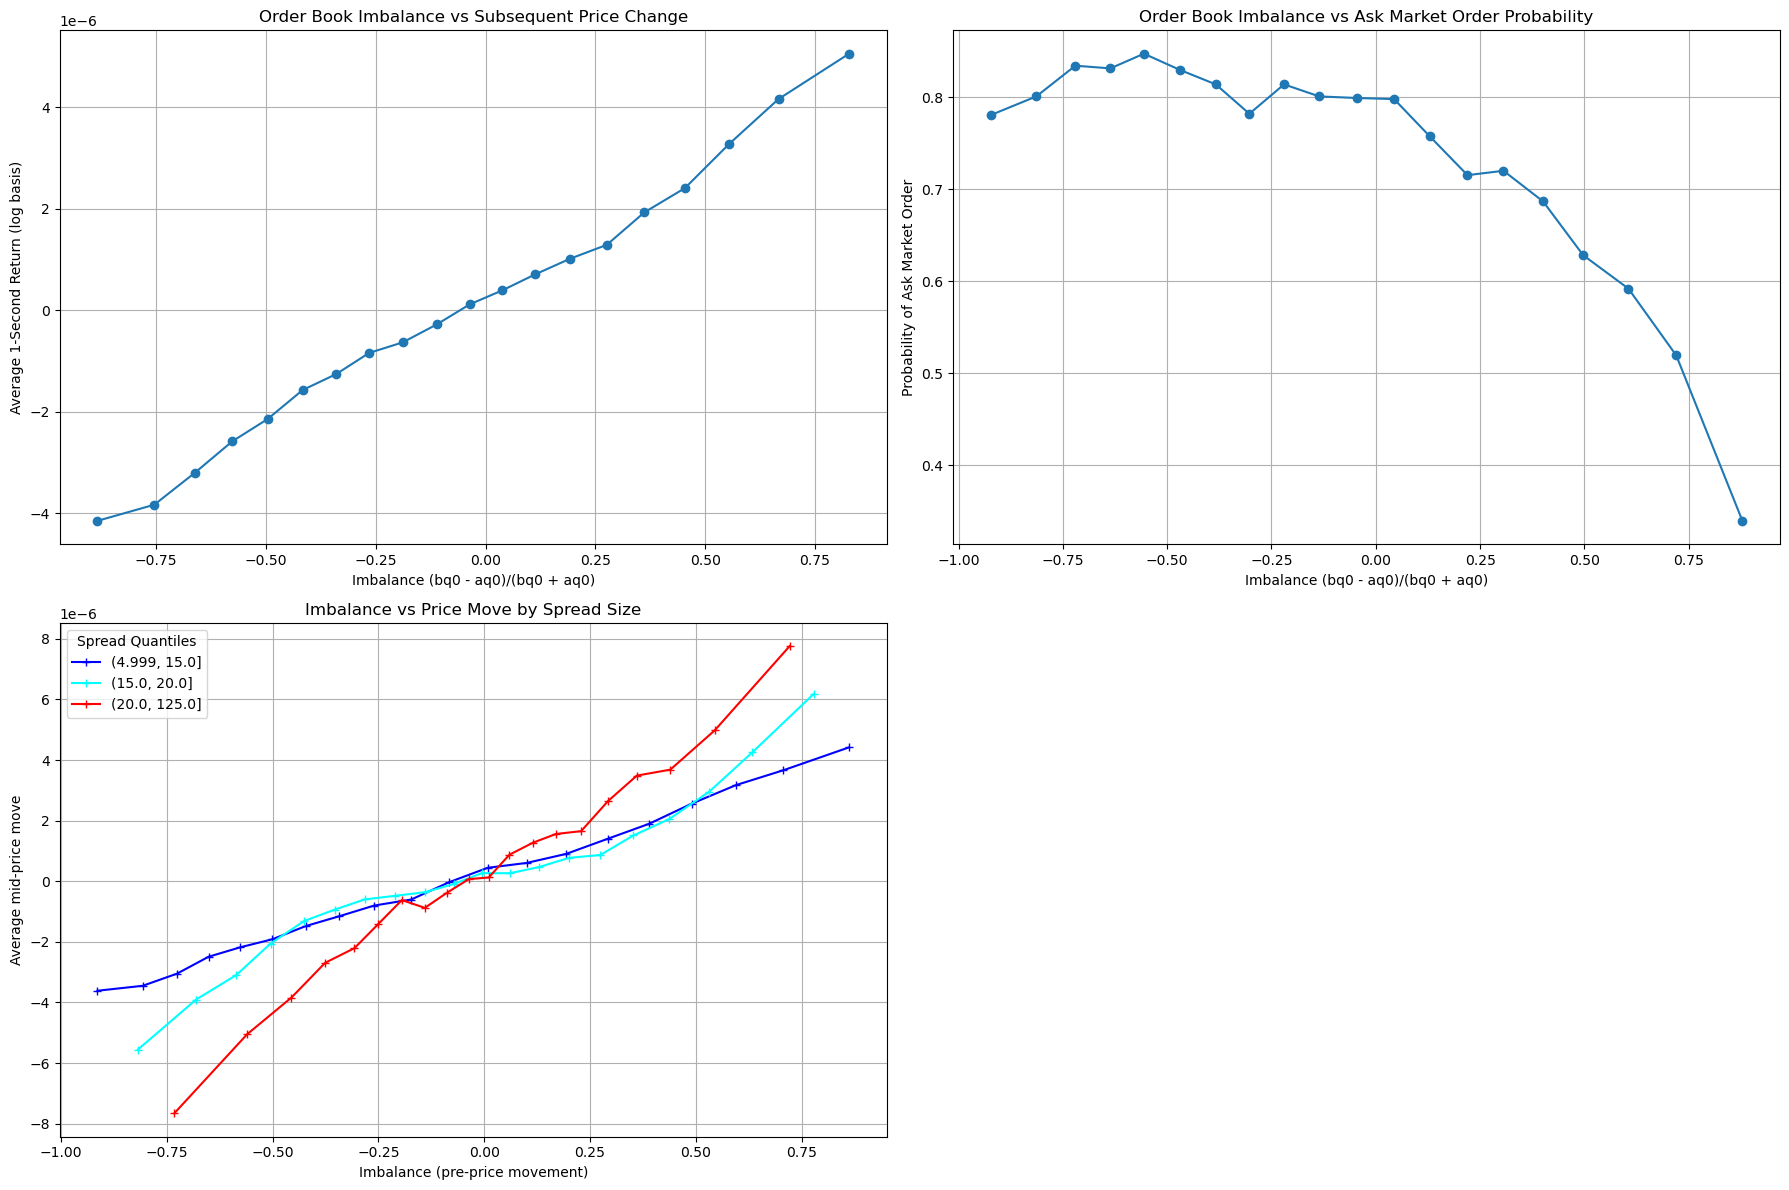

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate Order Book Imbalance
df['imbalance'] = (df['bq0'] - df['aq0']) / (df['bq0'] + df['aq0'].replace(0, np.nan))

# 2. Prepare Targets
# For mid-price moves (1-second horizon)
df['future_return'] = np.log(df['mid_price'].shift(-1)) - np.log(df['mid_price'])

# For trade signs (using simple quote test)
trades = df[df['etype'] == 'T'].copy()
trades['trade_sign'] = np.where(trades['eprice'] >= trades['ap0'], 1, -1)

# 3. Align Data
# For price prediction
price_data = df[['imbalance', 'future_return', 'spread']].dropna()

# For trade prediction
trade_data = trades[['imbalance', 'trade_sign']].dropna()
trade_data['sell_prob'] = (trade_data['trade_sign'] == -1).astype(int)

# Create visualizations
plt.figure(figsize=(18, 12))

# First plot: Imbalance vs Average Mid-Price Move
plt.subplot(2, 2, 1)
price_data['imbalance_bin'] = pd.qcut(price_data['imbalance'], 20, duplicates='drop')

grouped = price_data.groupby('imbalance_bin', observed=False).agg({
    'future_return': 'mean',
    'imbalance': 'mean'
})

plt.plot(grouped['imbalance'], grouped['future_return'], marker='o', linestyle='-')
plt.title('Order Book Imbalance vs Subsequent Price Change')
plt.xlabel('Imbalance (bq0 - aq0)/(bq0 + aq0)')
plt.ylabel('Average 1-Second Return (log basis)')
plt.grid(True)

# Second plot: Observed Imbalance vs Probability of Ask Market
plt.subplot(2, 2, 2)
trade_data['imbalance_bin'] = pd.qcut(trade_data['imbalance'], 20, duplicates='drop')

trade_grouped = trade_data.groupby('imbalance_bin', observed=False).agg({
    'sell_prob': 'mean',
    'imbalance': 'mean'
})

plt.plot(trade_grouped['imbalance'], trade_grouped['sell_prob'], marker='o', linestyle='-')
plt.title('Order Book Imbalance vs Ask Market Order Probability')
plt.xlabel('Imbalance (bq0 - aq0)/(bq0 + aq0)')
plt.ylabel('Probability of Ask Market Order')
plt.grid(True)

# Third plot: Imbalance vs Price Move for Different Spreads (fixed)
plt.subplot(2, 2, 3)
# Add explicit observed=False to spread grouping
spread_groups = price_data.groupby(
    pd.qcut(price_data['spread'], 4, duplicates='drop'), 
    observed=False  # Fix applied here
)

colors = ['blue', 'cyan', 'red', 'green']
labels = ['Narrow Spread', 'Medium Spread', 'Wide Spread', 'Very Wide Spread']

for i, (spread_range, group) in enumerate(spread_groups):
    group['imbalance_bin'] = pd.qcut(group['imbalance'], 20, duplicates='drop')
    spread_grouped = group.groupby('imbalance_bin', observed=False).agg({
        'future_return': 'mean',
        'imbalance': 'mean'
    })
    plt.plot(spread_grouped['imbalance'], spread_grouped['future_return'], 
             color=colors[i], marker='+', label=f'{spread_range}')

plt.title('Imbalance vs Price Move by Spread Size')
plt.xlabel('Imbalance (pre-price movement)')
plt.ylabel('Average mid-price move')
plt.legend(title='Spread Quantiles')
plt.grid(True)

plt.tight_layout()
plt.show()

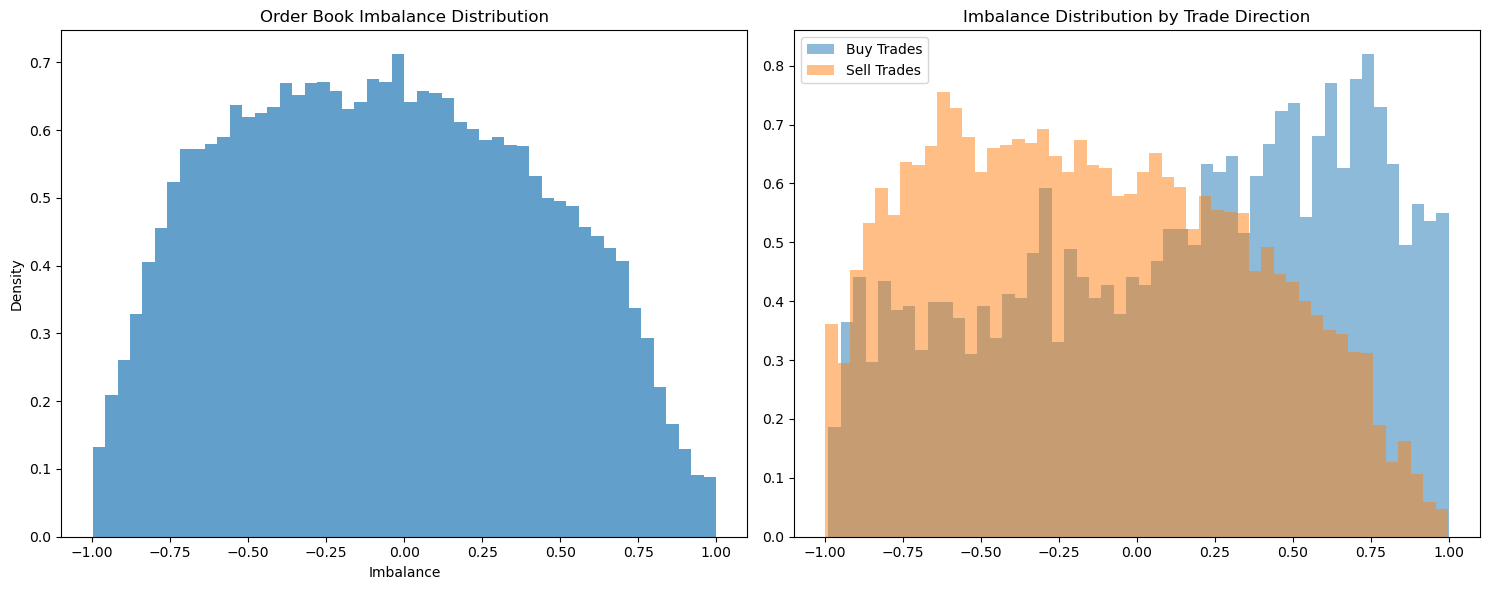

In [37]:
# Create Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Imbalance Distribution
ax1.hist(price_data['imbalance'], bins=50, density=True, alpha=0.7)
ax1.set_title('Order Book Imbalance Distribution')
ax1.set_xlabel('Imbalance')
ax1.set_ylabel('Density')

# Class-wise Imbalance Distribution
# Use sell_prob instead of buy_signal
buy_imb = trade_data[trade_data['sell_prob'] == 0]['imbalance']  # Buy trades when sell_prob=0
sell_imb = trade_data[trade_data['sell_prob'] == 1]['imbalance']  # Sell trades when sell_prob=1

ax2.hist(buy_imb, bins=50, alpha=0.5, label='Buy Trades', density=True)
ax2.hist(sell_imb, bins=50, alpha=0.5, label='Sell Trades', density=True)
ax2.set_title('Imbalance Distribution by Trade Direction')
ax2.legend()

plt.tight_layout()
plt.show()

## Imbalance Analysis

The imbalance shows moderate predictive power for trade signs (AUC 0.653, accuracy 61.14%). While not extremely strong, this suggests some informational content in the order book imbalance regarding imminent trade directions.


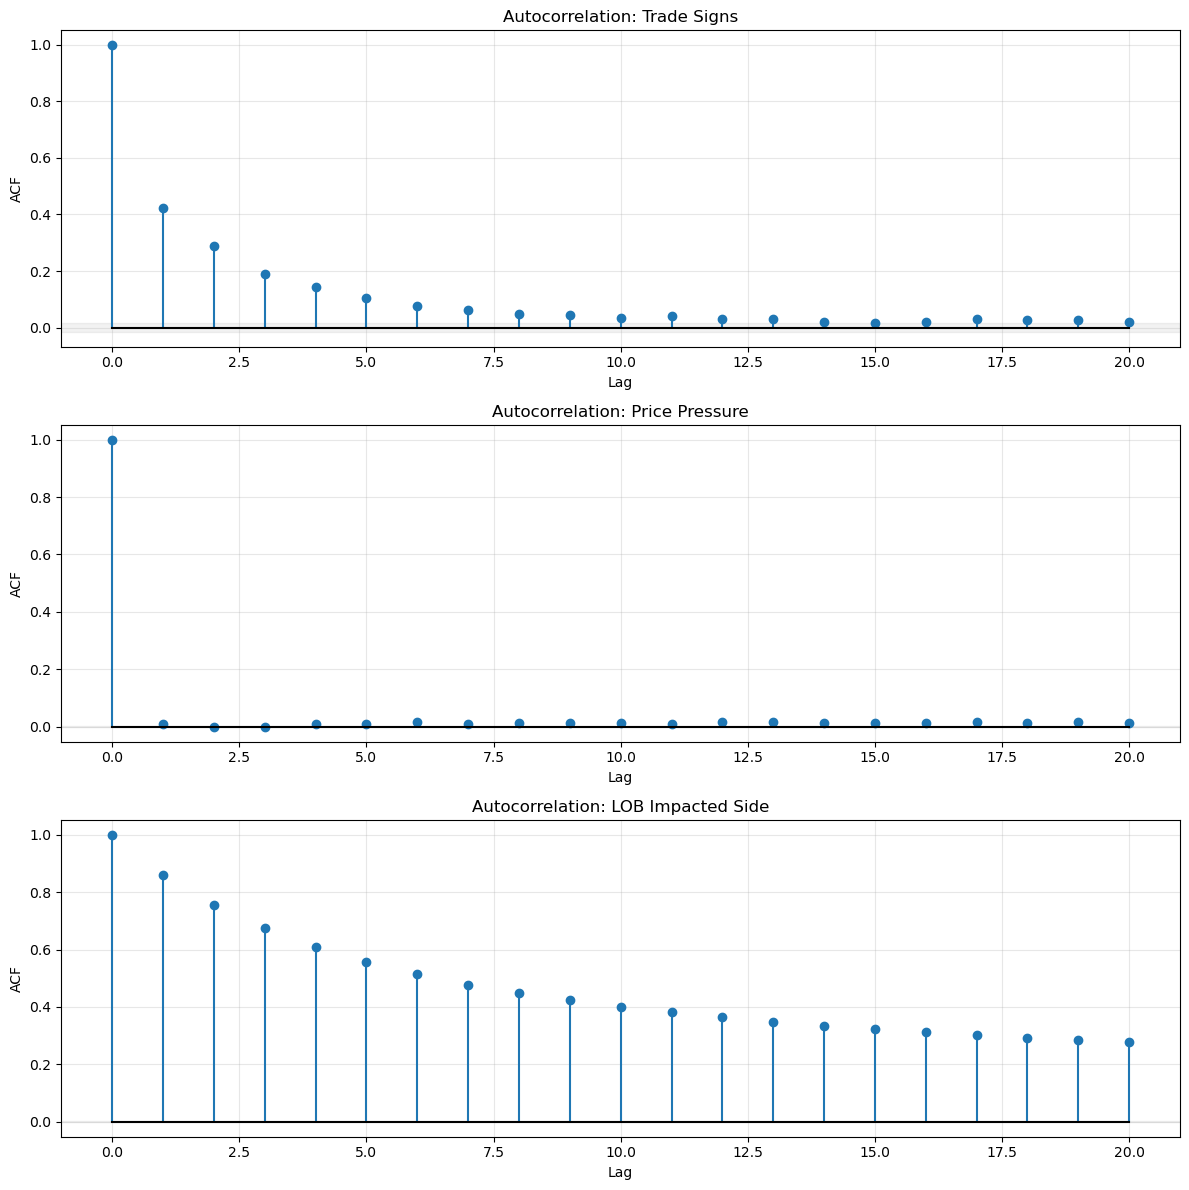


Autocorrelation Values:
   Lag Trade Signs Price Pressure Side Impact
0    0       1.000          1.000       1.000
1    1       0.422          0.010       0.859
2    5       0.105          0.008       0.557
3   10       0.036          0.013       0.401
4   20       0.020          0.013       0.276


In [39]:
# Prepare the required time series from existing data
# 1. Trade Signs (use the original trade signs before converting to buy/signal)
trade_signs = trade_data['trade_sign'].values  # This was missing in your code

# 2. Price Pressure (example calculation - modify based on your actual definition)
# This is a placeholder - replace with your actual price pressure calculation
price_pressure = df['mid_price'].diff().fillna(0).values  # Simple price change

# 3. Side Impact (example calculation - modify based on your actual definition)
# This is a placeholder - replace with your actual side impact calculation
side_impact = np.sign(df['imbalance']).fillna(0).values  # Sign of imbalance

def plot_proper_acf(series, ax, title, max_lag=20):
    """Proper ACF plot with markers and confidence intervals"""
    # Compute ACF
    acf_values = acf(series, nlags=max_lag, fft=True)
    
    # Create stem plot
    markerline, stemlines, baseline = ax.stem(
        np.arange(max_lag+1), 
        acf_values,
        linefmt='C0-',
        markerfmt='C0o',
        basefmt='k-'
    )
    
    # Formatting
    ax.set_title(f'Autocorrelation: {title}', fontsize=12)
    ax.set_xlabel('Lag', fontsize=10)
    ax.set_ylabel('ACF', fontsize=10)
    #ax.set_ylim(-0.2, 0.5)
    ax.grid(True, alpha=0.3)
    
    # Add confidence interval (95%)
    conf_int = 1.96 / np.sqrt(len(series))
    ax.axhspan(-conf_int, conf_int, color='gray', alpha=0.1)

# Create figure
fig, ax = plt.subplots(3, 1, figsize=(12, 12), dpi=100)

# 1. Trade Signs ACF (using actual trade signs from data)
plot_proper_acf(trade_signs, ax[0], "Trade Signs")

# 2. Price Pressure ACF
plot_proper_acf(price_pressure, ax[1], "Price Pressure")

# 3. Side Impact ACF
plot_proper_acf(side_impact, ax[2], "LOB Impacted Side")

plt.tight_layout()
plt.show()

# Add numerical results table
table = []
for lag in [0, 1, 5, 10, 20]:
    row = [lag]
    for series in [trade_signs, price_pressure, side_impact]:
        acf_val = acf(series, nlags=20, fft=True)[lag]
        row.append(f"{acf_val:.3f}")
    table.append(row)

print("\nAutocorrelation Values:")
print(pd.DataFrame(table, columns=["Lag", "Trade Signs", "Price Pressure", "Side Impact"]))


## Autocorrelations

- **Trade Signs**: Show significant short-term autocorrelation (0.422 at lag 1), indicating some persistence in trade directionality
- **Price Pressure**: Minimal autocorrelation, suggesting price movements don't exhibit strong short-term dependence
- **Side Impact**: Moderate autocorrelation that decays with lag, indicating some short-term dependence in the impact of orders on specific sides of the book